In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [43]:

df = pd.read_csv("SMSSpamCollection.csv", sep="\t", header=None, names=["label", "message"])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [44]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


In [45]:

X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42
)


In [46]:

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

results = {}


In [47]:

#Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
results['Naive Bayes'] = accuracy_score(y_test, nb_pred)

print("📌 Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred, target_names=["Ham", "Spam"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("-" * 50)


📌 Naive Bayes Results:
Accuracy: 0.97847533632287
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[966   0]
 [ 24 125]]
--------------------------------------------------


In [48]:

#  Support Vector Machine (SVM)
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)
results['SVM'] = accuracy_score(y_test, svm_pred)

print("📌 SVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred, target_names=["Ham", "Spam"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("-" * 50)


📌 SVM Results:
Accuracy: 0.9901345291479821
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       966
        Spam       0.99      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
 [[965   1]
 [ 10 139]]
--------------------------------------------------


In [49]:

#  Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
results['Random Forest'] = accuracy_score(y_test, rf_pred)

print("📌 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred, target_names=["Ham", "Spam"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("-" * 50)



📌 Random Forest Results:
Accuracy: 0.9811659192825112
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[966   0]
 [ 21 128]]
--------------------------------------------------


In [50]:

print("\n✅ Model Accuracy Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")



✅ Model Accuracy Comparison:
Naive Bayes: 0.9785
SVM: 0.9901
Random Forest: 0.9812


In [58]:
model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")  # binary classification
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
history = model.fit(
    X_train_dense, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_dense, y_test),
    verbose=1
)


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8553 - loss: 0.5369 - val_accuracy: 0.8664 - val_loss: 0.1862
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9091 - loss: 0.1506 - val_accuracy: 0.9919 - val_loss: 0.0712
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9963 - loss: 0.0346 - val_accuracy: 0.9901 - val_loss: 0.0438
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9984 - loss: 0.0094 - val_accuracy: 0.9919 - val_loss: 0.0430
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9995 - loss: 0.0038 - val_accuracy: 0.9928 - val_loss: 0.0466


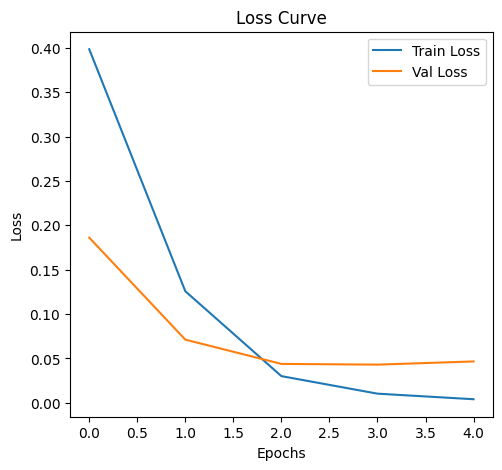

In [60]:

# Loss & Accuracy Curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()


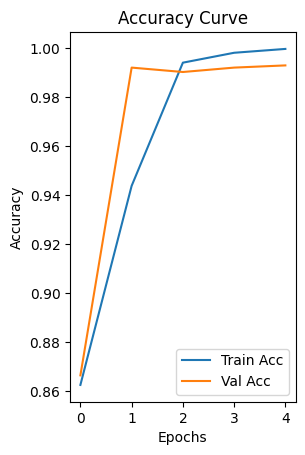

In [61]:

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


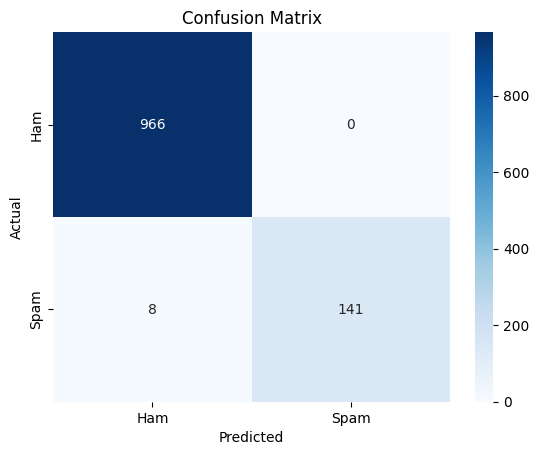

In [62]:
y_pred_probs = model.predict(X_test_dense)

y_pred = (y_pred_probs > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


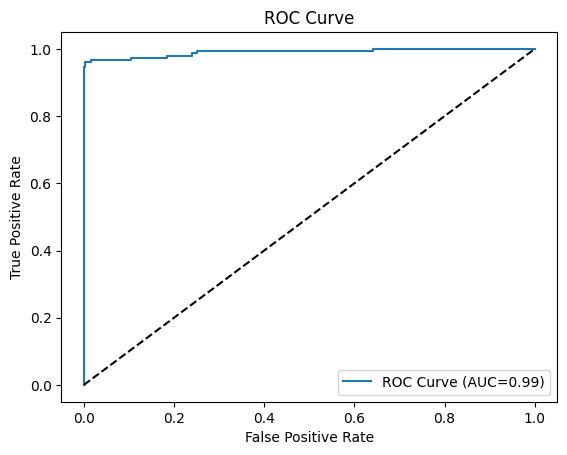

In [63]:

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()